<a href="https://colab.research.google.com/github/Lafri-13/Adult-Census-Income-Classification/blob/main/CM2604_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [722]:
!pip install ucimlrepo

# Description of Dataset

In [723]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [724]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [725]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [726]:
X = X.drop(['education', 'fnlwgt'], axis=1)

In [727]:
X

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [728]:
X.shape

(48842, 12)

### Checking and Forward Filling Null Values

Forward filling will fill the NaN values with the last obsereved non missing value

In [729]:
X.isnull().sum()

age                 0
workclass         963
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [730]:
X.fillna(method = 'ffill', inplace=True)

In [731]:
X.shape

(48842, 12)

In [732]:
X.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [733]:
y['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

### Replace the string without the fullstops

In [734]:
y.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
y.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)

<ipython-input-734-fdda84f7673c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
<ipython-input-734-fdda84f7673c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)


In [735]:
y['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [736]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [737]:
X['native-country'].value_counts()

United-States                 44087
Mexico                          955
?                               583
Philippines                     296
Germany                         207
Puerto-Rico                     184
Canada                          182
El-Salvador                     158
India                           155
Cuba                            138
England                         127
China                           123
South                           115
Italy                           106
Jamaica                         106
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### Replacing ? with Nan

In [738]:
X.replace('?', np.NaN, inplace=True)

In [739]:
X.fillna(method = 'ffill', inplace=True)

In [740]:
X['native-country'].value_counts()

United-States                 44611
Mexico                          969
Philippines                     298
Germany                         211
Puerto-Rico                     188
Canada                          185
El-Salvador                     161
India                           156
Cuba                            140
England                         130
China                           125
South                           115
Jamaica                         108
Dominican-Republic              107
Italy                           106
Japan                            93
Vietnam                          91
Guatemala                        90
Columbia                         87
Poland                           87
Haiti                            76
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           50
Nicaragua                        49
Peru                             48
Ecuador                     

### Gaussian Naive Bayes only Work with numeric values

so using label encoder to change strings to numaric values

In [741]:
X_nb = X.copy()

In [742]:
X_nb

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [743]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_nb['workclass'] = label_encoder.fit_transform(X_nb['workclass'])
X_nb['marital-status'] = label_encoder.fit_transform(X_nb['marital-status'])
X_nb['occupation'] = label_encoder.fit_transform(X_nb['occupation'])
X_nb['relationship'] = label_encoder.fit_transform(X_nb['relationship'])
X_nb['race'] = label_encoder.fit_transform(X_nb['race'])
X_nb['sex'] = label_encoder.fit_transform(X_nb['sex'])
X_nb['native-country'] = label_encoder.fit_transform(X_nb['native-country'])

X_nb

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,13,4,0,1,4,1,2174,0,40,38
1,50,5,13,2,3,0,4,1,0,0,13,38
2,38,3,9,0,5,1,4,1,0,0,40,38
3,53,3,7,2,5,0,2,1,0,0,40,38
4,28,3,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,0,9,1,4,0,0,0,36,38
48838,64,3,9,6,9,2,2,1,0,0,40,38
48839,38,3,13,2,9,0,4,1,0,0,50,38
48840,44,3,13,0,0,3,1,1,5455,0,40,38


test_size = 0.2 means 20% of the data will be tested while 80% of the data will be trained

In [744]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_nb, y, test_size = 0.2)

# Gaussian Naive Bayes

In [745]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_prediction_gnb = gnb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [746]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_gnb))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7441
        >50K       0.67      0.32      0.43      2328

    accuracy                           0.80      9769
   macro avg       0.75      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [747]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction_gnb)*100)

80.06960794349473


In [748]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_prediction_gnb)

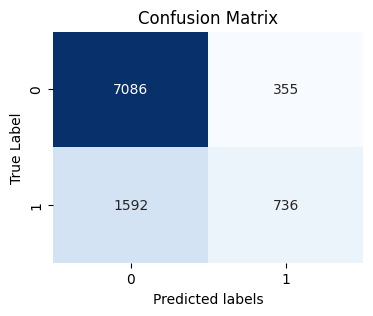

In [749]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()